In [1]:
%pylab inline
from ROOT import TCanvas, TH1F  
import numpy as np

Populating the interactive namespace from numpy and matplotlib
Welcome to JupyROOT 6.16/00


## The code in the next cell is based on https://github.com/diptaparna/lhereader

In [2]:
import xml.etree.ElementTree as ET
from ROOT import TLorentzVector

class Particle:
    def __init__(self,pdgid,px=0,py=0,pz=0,energy=0,mass=0):
        self.pdgid=pdgid
        self.px=px
        self.py=py
        self.pz=pz
        self.energy=energy
        self.mass=mass
    
    @property
    def p4(self):
        return TLorentzVector(self.px,self.py,self.pz,self.energy)
    
    @p4.setter
    def p4(self,value):
        self.px=value.Px()
        self.py=value.Py()
        self.pz=value.Pz()
        self.energy=value.E()
        self.mass=value.M()
    
    @property
    def p(self):
        return self.p4.P()
    
    @property
    def eta(self):
        return self.p4.Eta()
    
    @property
    def pt(self):
        return self.p4.Pt()
    
    
class Event:
    def __init__(self,num_particles):
        self.num_particles=num_particles
        self.particles=[]
    
    def __addParticle__(self,particle):
        self.particles.append(particle)
        
    def getParticlesByIDs(self,idlist):
        partlist=[]
        for pdgid in idlist:
            for p in self.particles:
                if p.pdgid==pdgid:
                    partlist.append(p)
        return partlist

class LHEFData:
    def __init__(self,version):
        self.version=version
        self.events=[]
    
    def __addEvent__(self,event):
        self.events.append(event)
        
    def getParticlesByIDs(self,idlist):
        partlist=[]
        for event in self.events:
            partlist.extend(event.getParticlesByIDs(idlist))
        return partlist
        
def readLHEF(name):
    tree = ET.parse(name)
    root=tree.getroot()
    lhefdata=LHEFData(float(root.attrib['version']))
    for child in root:
        if(child.tag=='event'):
            lines=child.text.strip().split('\n')
            event_header=lines[0].strip()
            num_part=int(event_header.split()[0].strip())
            e=Event(num_part)
            #print num_part
            for i in range(0,4):
                ## comment the below line for big samples
                print lines[i]
                part_data=lines[i].strip().split()
                p=Particle(int(part_data[0]), float(part_data[2]), float(part_data[3]), float(part_data[4]), float(part_data[5]), float(part_data[6]) )
                e.__addParticle__(p)
            lhefdata.__addEvent__(e)
    return lhefdata


In [3]:
data=readLHEF('input_events/kk.lhe')

14 -1 0.00000000 0.00000000 22.83858677 22.83858677 0.0
14  1 0.24259744 -0.08935654 16.65072675 16.65273369 0.0
13  1 -0.16151821 0.09190782 4.62921376 4.63414705 0.10565800
-13  1 -0.07843326 -0.00920405 1.54608629 1.55170323 0.10565800
14 -1 0.00000000 0.00000000 23.96306745 23.96306745 0.0
14  1 -0.20603459 -0.13110205 19.54298281 19.54450856 0.0
13  1 0.14758654 0.17028798 2.10930003 2.12393268 0.10565800
-13  1 0.01557823 0.09354726 2.28996195 2.29435898 0.10565800
14 -1 0.00000000 0.00000000 42.88625605 42.88625605 0.0
14  1 -0.43077902 -0.40506983 27.46096561 27.46733122 0.0
13  1 0.17886010 -0.04505406 3.58115421 3.58745730 0.10565800
-13  1 0.20744227 0.51291865 11.81796269 11.83137877 0.10565800
14 -1 0.00000000 0.00000000 3.35737465 3.35737465 0.0
14  1 -0.03561823 -0.04653768 0.73031577 0.73266331 0.0
13  1 -0.00384863 -0.00210103 1.48224469 1.48601217 0.10565800
-13  1 0.00806881 0.06968832 1.13159248 1.13867762 0.10565800
14 -1 0.00000000 0.00000000 3.82754820 3.82754820

### Invariant mass definition

In [4]:
def inv_mass(e1,e2,px1,py1,pz1,px2,py2,pz2):
    a=(e1+e2)**2 - ((px1+px2)**2+(py1+py2)**2+(pz1+pz2)**2)
    return np.sqrt(a),a

In [5]:
#def cut(eta,energy):
#    '''
#    input --> i. eta, and energy.
#    output --> ii. cutm theta, and energy
#    '''
#    theta=2.*arctan(np.exp(-eta))
#    f=energy*theta**2
#    return f,theta,energy

In [6]:
parts=data.getParticlesByIDs([-13,13])# collect all muons and antimuons

### Extracting relevant information in arrays (It must exist a  better way to do it) 

In [7]:
x=[]
y=[]
for p in parts:
    if p.pdgid==13:
        #print p.eta
        a1=p.energy
        a2=p.px
        a3=p.py
        a4=p.pz
        x.append([a1,a2,a3,a4])
        pass
for q in parts:
    if q.pdgid==-13:
        #print p.eta
        b1=q.energy
        b2=q.px
        b3=q.py
        b4=q.pz
        y.append([b1,b2,b3,b4])
        pass    
kk1=np.asarray(x)    
kk2=np.asarray(y)    

In [39]:
c=TCanvas()  
c.SetLogx()
hist=TH1F("k", "Test plot",50,1e-2,1)  
for i in np.arange (0,kk1.shape[0]): 
    e1= kk1[i][0]
    e2= kk2[i][0]
    px1=kk1[i][1]
    px2=kk2[i][1]
    py1=kk1[i][2]
    py2=kk2[i][2]
    pz1=kk1[i][3]
    pz2=kk2[i][3]
    hist.Fill( inv_mass(e1,e2,px1,py1,pz1,px2,py2,pz2)[0])
hist.SetXTitle("m_{#mu^{+} #mu^{-}} [GeV]")
hist.SetYTitle("Arbitrary Units")
hist.Draw()  


Warning in <TROOT::Append>: Replacing existing TH1: k (Potential memory leak).


In [40]:
#c = TCanvas("myCanvasName","The Canvas Title",800,600)
hist.Draw()

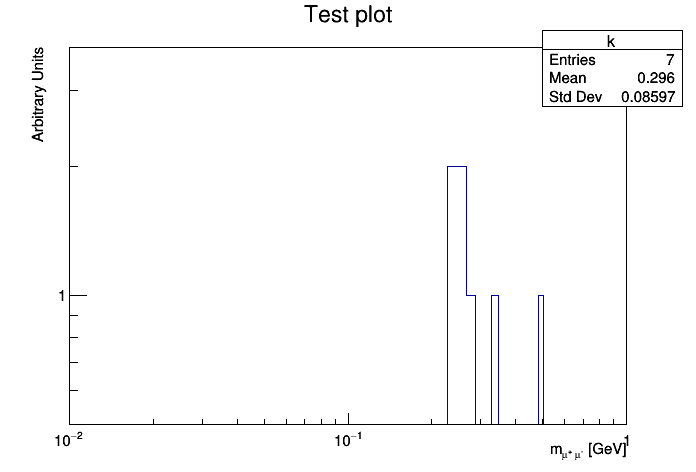

In [41]:
c.SetLogx()
c.SetLogy()
#c.SetFillColor(38)
c.Draw()

## Count of the events per bin and the total number of events 

In [42]:
g=hist
N=50  # Total number of bins in the histogram

In [46]:
w1=[]
for i in range(0,N+1):
    w1.append([g.GetBinContent(i)]) # Filling w1
    y=np.asarray(x)
    print g.GetBin(i), g.GetBinContent(i)

0 0.0
1 0.0
2 0.0
3 0.0
4 0.0
5 0.0
6 0.0
7 0.0
8 0.0
9 0.0
10 0.0
11 0.0
12 2.0
13 2.0
14 1.0
15 0.0
16 0.0
17 1.0
18 0.0
19 0.0
20 0.0
21 0.0
22 0.0
23 0.0
24 0.0
25 1.0
26 0.0
27 0.0
28 0.0
29 0.0
30 0.0
31 0.0
32 0.0
33 0.0
34 0.0
35 0.0
36 0.0
37 0.0
38 0.0
39 0.0
40 0.0
41 0.0
42 0.0
43 0.0
44 0.0
45 0.0
46 0.0
47 0.0
48 0.0
49 0.0
50 0.0


## Total number of events 

In [48]:
NevT = np.sum(w1) # Total number of events --> Sum of all the events in all bins

In [49]:
print NevT

7.0
